In [12]:

# Load dataset as 'df' from URI: /Users/gabrielaterrazas/Desktop/erdos-uncreatives-1/raw_data_read_only/data_cleaning/clean_data2.csv
import pandas as pd
df = pd.read_csv(r'/Users/gabrielaterrazas/Desktop/erdos-uncreatives-1/raw_data_read_only/data_cleaning/clean_data2.csv')

# Display basic information about the dataset
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19185 entries, 0 to 19184
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   channelDescription   18151 non-null  object 
 1   channelJoinedDate    19185 non-null  object 
 2   channelLocation      13922 non-null  object 
 3   channelTotalVideos   19185 non-null  float64
 4   channelTotalViews    19185 non-null  float64
 5   channelUsername      19185 non-null  object 
 6   commentsCount        19163 non-null  float64
 7   date                 19184 non-null  object 
 8   duration             18818 non-null  object 
 9   id                   19185 non-null  object 
 10  isChannelVerified    19185 non-null  bool   
 11  likes                19167 non-null  float64
 12  numberOfSubscribers  19185 non-null  float64
 13  order                19185 non-null  float64
 14  text                 5657 non-null   object 
 15  title                19185 non-null 

,channelDescription,channelJoinedDate,channelLocation,channelTotalVideos,channelTotalViews,channelUsername,commentsCount,date,duration,id,isChannelVerified,likes,numberOfSubscribers,order,text,title,url,viewCount
0,Business inquiries only: info@nikkietutorials....,"Jun 23, 2008",Netherlands,909.0,2.092121e+09,nikkietutorials,1844.0,2025-01-01T17:03:25.000Z,00:01:20,IF6k0pRUGVM,True,824000.0,14600000.0,1.0,NaN,ICE CREAM lipstick?! 🍦👄,https://www.youtube.com/shorts/IF6k0pRUGVM,10628400.0
1,Business inquiries only: info@nikkietutorials....,"Jun 23, 2008",Netherlands,909.0,2.092121e+09,nikkietutorials,1845.0,2024-09-26T17:09:34.000Z,00:00:59,qmrnz6Ee3Vs,True,468000.0,14600000.0,4.0,NaN,trying TAPE makeup?! 🤔,https://www.youtube.com/shorts/qmrnz6Ee3Vs,7355705.0
2,Business inquiries only: info@nikkietutorials....,"Jun 23, 2008",Netherlands,909.0,2.092121e+09,nikkietutorials,1398.0,2024-12-13T17:06:39.000Z,00:01:06,iMhxKAQmHuc,True,329000.0,14600000.0,2.0,NaN,Trying OLD AGE Filter Makeup 👵🏻,https://www.youtube.com/shorts/iMhxKAQmHuc,4324309.0
3,Business inquiries only: info@nikkietutorials....,"Jun 23, 2008",Netherlands,909.0,2.092121e+09,nikkietutorials,529.0,2025-02-16T18:19:19.000Z,00:01:25,bM3XWjv8lfI,True,120000.0,14600000.0,0.0,NaN,trying this CRAZY viral hair tool.. 🧐,https://www.youtube.com/shorts/bM3XWjv8lfI,2108698.0
4,Business inquiries only: info@nikkietutorials....,"Jun 23, 2008",Netherlands,909.0,2.092121e+09,nikkietutorials,4539.0,2024-07-07T17:33:45.000Z,00:01:00,L0mCS-xdzbc,True,662000.0,14600000.0,6.0,NaN,if “trusting the process” was a makeup look 😱,https://www.youtube.com/shorts/L0mCS-xdzbc,8539105.0


In [13]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, levene, zscore

# Set visualization style
sns.set_style("whitegrid")

# Function for computing Cohen's d (effect size)
def cohen_d(x, y):
    return (np.mean(x) - np.mean(y)) / np.sqrt((np.var(x, ddof=1) + np.var(y, ddof=1)) / 2)

In [14]:
# Team has not yet decided on a definition of "engagement". For now,
# we will consider the following metrics: likes, commentsCount, viewCount
# and numberOfSubscribers. 
# Handling missing values
df['likes'].fillna(0, inplace=True)
df['commentsCount'].fillna(0, inplace=True)
df['viewCount'].fillna(0, inplace=True)
df['numberOfSubscribers'].replace(0, 1, inplace=True)  # Avoid division by zero

# Remove any remaining NaN values
df.dropna(inplace=True)

# Check for missing values again
df.isnull().sum()


/var/folders/hc/hk_g2yrn5c1b90f6bqlqwy100000gn/T/ipykernel_22428/1841274024.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['likes'].fillna(0, inplace=True)
/var/folders/hc/hk_g2yrn5c1b90f6bqlqwy100000gn/T/ipykernel_22428/1841274024.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

channelDescription     0
channelJoinedDate      0
channelLocation        0
channelTotalVideos     0
channelTotalViews      0
channelUsername        0
commentsCount          0
date                   0
duration               0
id                     0
isChannelVerified      0
likes                  0
numberOfSubscribers    0
order                  0
text                   0
title                  0
url                    0
viewCount              0
dtype: int64

In [15]:

# Standardizing engagement-related variables
engagement_vars = ["likes", "commentsCount", "viewCount", "numberOfSubscribers"]

# Apply Z-score standardization
for var in engagement_vars:
    df[f"{var}_std"] = zscore(df[var])

# I will also compute two engagement metrics:
# Engagement per Subscriber (to assess subscriber loyalty, but won't reflect new viewers' interactions)
# and Engagement per View (to assess how engaging the content is to viewers, but this can be influenced by algorithms)
df["Engagement_per_Subscriber"] = (df["likes"] + df["commentsCount"]) / (df["numberOfSubscribers"] + 1)
df["Engagement_per_View"] = (df["likes"] + df["commentsCount"]) / (df["viewCount"] + 1)

# Ensure no NaN or infinite values in the engagement metrics
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=["Engagement_per_Subscriber", "Engagement_per_View"], inplace=True)

In [ ]:

# Compute correlation matrix for engagement-related variables to assess multicollinearity
correlation_matrix = df[["likes_std", "commentsCount_std", "viewCount_std", "numberOfSubscribers_std", "Engagement_per_Subscriber","Engagement_per_View"]].corr()

# Display the correlation matrix
correlation_matrix


,likes_std,commentsCount_std,viewCount_std,numberOfSubscribers_std,Engagement_per_Subscriber,Engagement_per_View
likes_std,1.000000,0.669799,0.992172,0.193198,0.429998,0.030713
commentsCount_std,0.669799,1.000000,0.660203,0.256227,0.261947,0.025439
viewCount_std,0.992172,0.660203,1.000000,0.204075,0.398153,0.021633
numberOfSubscribers_std,0.193198,0.256227,0.204075,1.000000,-0.006599,0.031061
Engagement_per_Subscriber,0.429998,0.261947,0.398153,-0.006599,1.000000,0.040851
Engagement_per_View,0.030713,0.025439,0.021633,0.031061,0.040851,1.000000


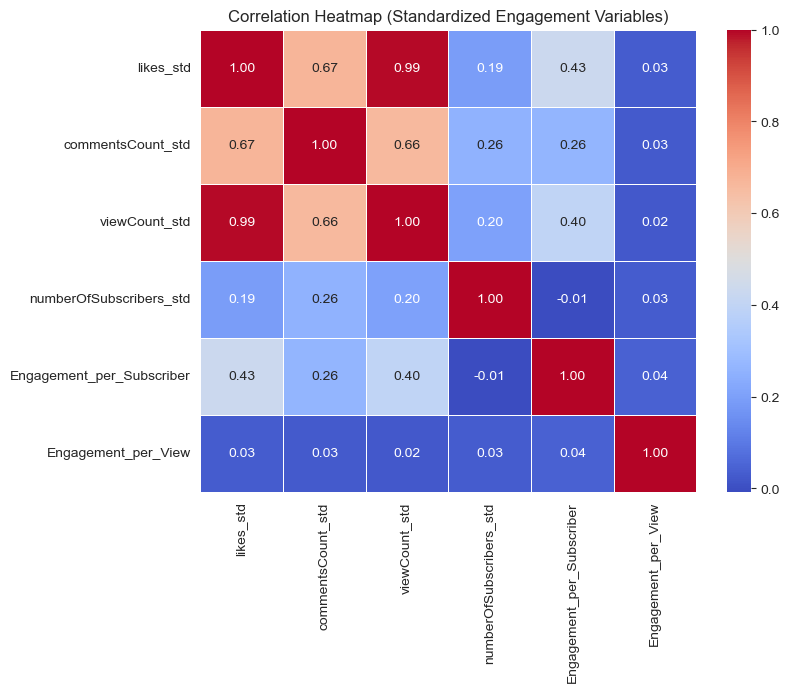

In [17]:

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Standardized Engagement Variables)")
plt.show()


/var/folders/hc/hk_g2yrn5c1b90f6bqlqwy100000gn/T/ipykernel_22428/2698439863.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["isChannelVerified"], y=df["likes_std"], showfliers=False, ax=axes[0, 0], palette=["blue", "red"])
/var/folders/hc/hk_g2yrn5c1b90f6bqlqwy100000gn/T/ipykernel_22428/2698439863.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["isChannelVerified"], y=df["commentsCount_std"], showfliers=False, ax=axes[0, 1], palette=["blue", "red"])
/var/folders/hc/hk_g2yrn5c1b90f6bqlqwy100000gn/T/ipykernel_22428/2698439863.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and s

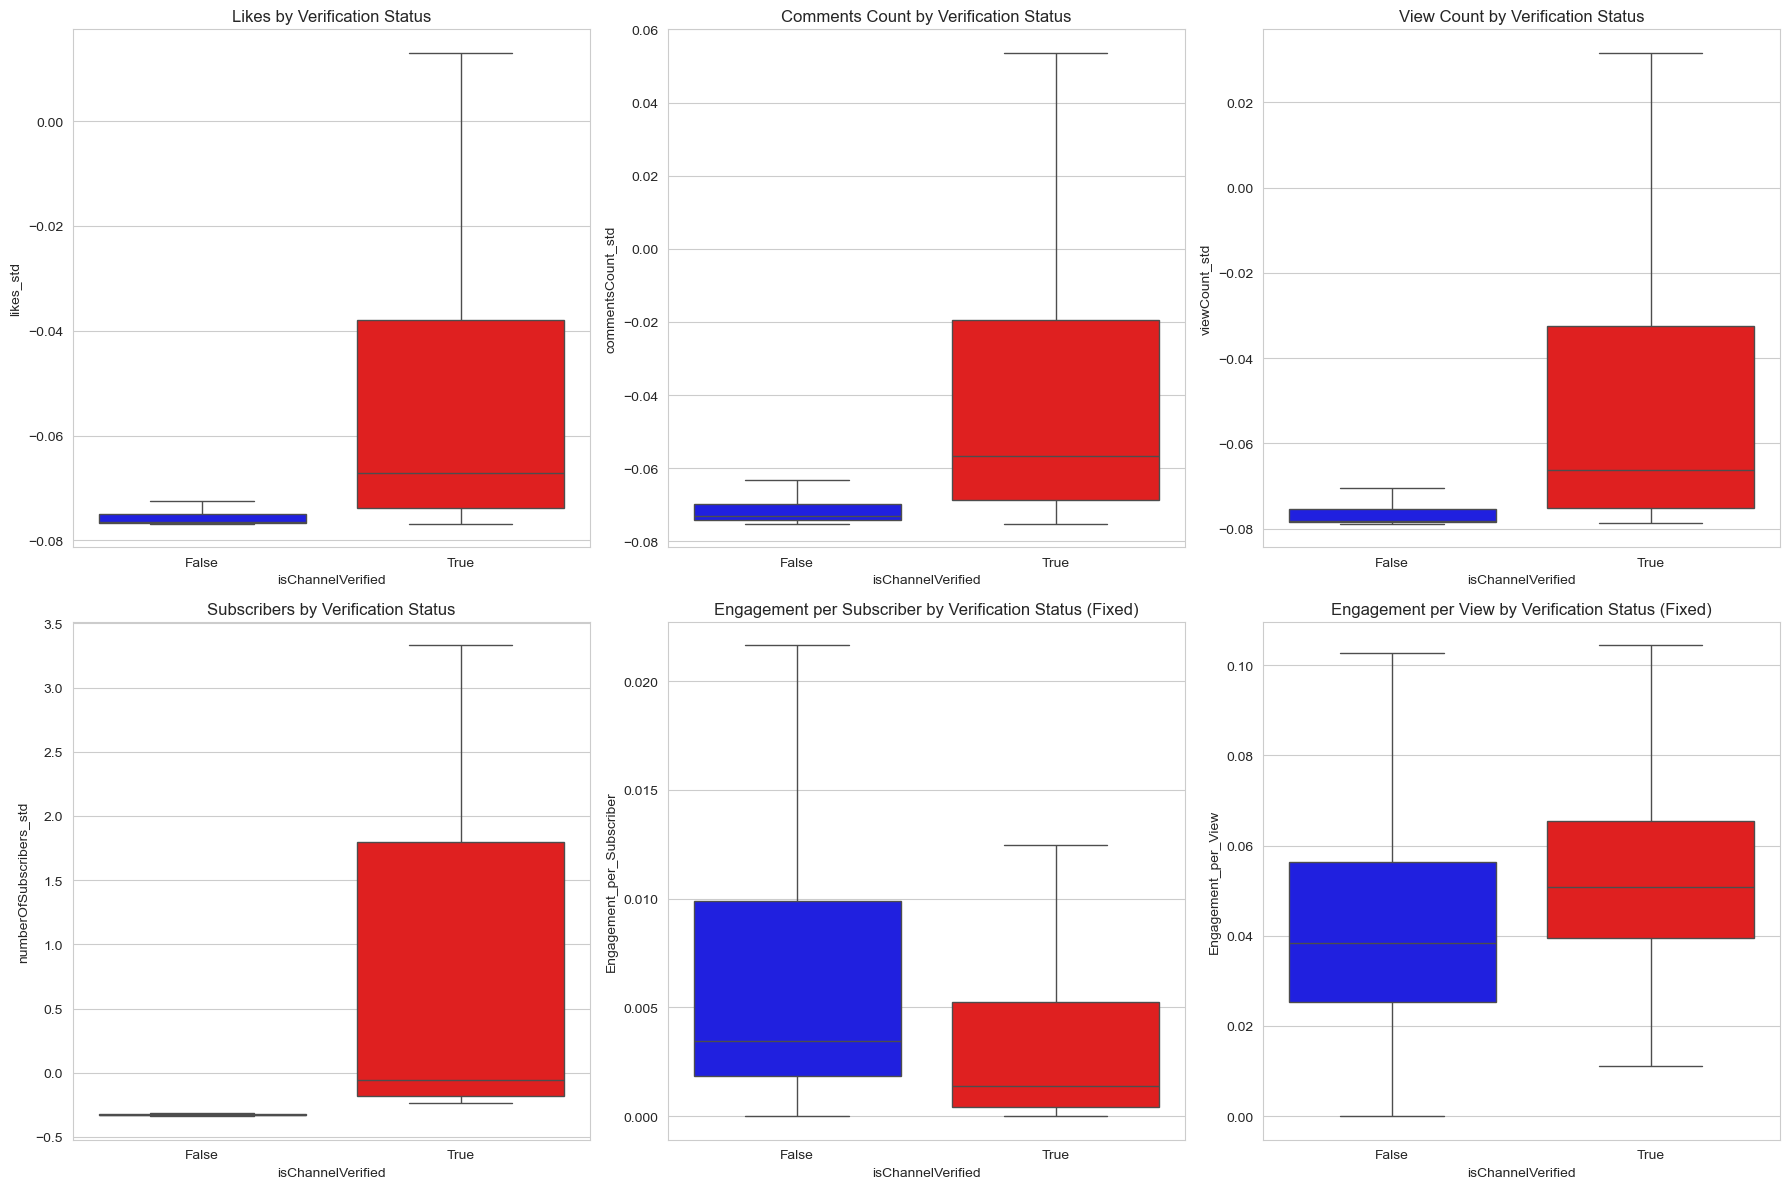

In [20]:

# Boxplots for standardized engagement variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.boxplot(x=df["isChannelVerified"], y=df["likes_std"], showfliers=False, ax=axes[0, 0], palette=["blue", "red"])
axes[0, 0].set_title("Likes by Verification Status")

sns.boxplot(x=df["isChannelVerified"], y=df["commentsCount_std"], showfliers=False, ax=axes[0, 1], palette=["blue", "red"])
axes[0, 1].set_title("Comments Count by Verification Status")

sns.boxplot(x=df["isChannelVerified"], y=df["viewCount_std"], showfliers=False, ax=axes[0, 2], palette=["blue", "red"])
axes[0, 2].set_title("View Count by Verification Status")

sns.boxplot(x=df["isChannelVerified"], y=df["numberOfSubscribers_std"], showfliers=False, ax=axes[1, 0], palette=["blue", "red"])
axes[1, 0].set_title("Subscribers by Verification Status")

sns.boxplot(x=df["isChannelVerified"], y=df["Engagement_per_Subscriber"], showfliers=False, ax=axes[1, 1], palette=["blue", "red"])
axes[1, 1].set_title("Engagement per Subscriber by Verification Status (Fixed)")

sns.boxplot(x=df["isChannelVerified"], y=df["Engagement_per_View"], showfliers=False, ax=axes[1, 2], palette=["blue", "red"])
axes[1, 2].set_title("Engagement per View by Verification Status (Fixed)")

plt.tight_layout()
plt.show()


In [21]:

# Prepare subsets
verified = df[df["isChannelVerified"] == True].copy()
non_verified = df[df["isChannelVerified"] == False].copy()

# Compute T-tests and Effect Sizes (Cohen's d)
t_test_results = { "Metric": [], "T-test p-value": [], "Effect Size (Cohen's d)": []}

for metric in ["likes_std", "commentsCount_std", "viewCount_std", "numberOfSubscribers_std", "Engagement_per_Subscriber", "Engagement_per_View"]:
    ttest_p = ttest_ind(verified[metric], non_verified[metric], nan_policy='omit').pvalue
    d_value = cohen_d(verified[metric].dropna(), non_verified[metric].dropna())

    t_test_results["Metric"].append(metric)
    t_test_results["T-test p-value"].append(ttest_p)
    t_test_results["Effect Size (Cohen's d)"].append(d_value)

# Convert to DataFrame and display results
t_test_df = pd.DataFrame(t_test_results)
t_test_df

,Metric,T-test p-value,Effect Size (Cohen's d)
0,likes_std,1.013333e-12,0.180257
1,commentsCount_std,1.531335e-13,0.183133
2,viewCount_std,3.850767e-14,0.189990
3,numberOfSubscribers_std,0.000000e+00,1.057983
4,Engagement_per_Subscriber,6.813656e-01,-0.016489
5,Engagement_per_View,7.149232e-06,0.180559


In [23]:
# Key findings:
# - The number of subscribers is significantly higher for verified channels compared to non-verified channels.
# - Verified channels have higher median values for:
#       Views (Significantly higher)
#       Subscribers (Significantly higher)
#       Likes (Moderately higher)
#       Comments (Slightly higher)
#  - Non-verified channels exhibit greater variability, meaning some smaller creators achieve high engagement rates.
#  - When looking at engagement per view there was no significant difference between verified and non-verified channels. Suggesting that verification doesn't make videos more engaging per viewer
#  - When looking at engagement per subscriber, non-verified channels have a slightly higher engagement rate, suggesting that smaller creators have highly engaged audiences despite having fewer subscribers.
#  - Results showed a large effect size of verification on number of subscribers, and little to no effect on every other measure of engagement. This suggests that verification is not a strong indicator of engagement, but rather a reflection of the channel's popularity and reach. 
# Exploratory analysis suggests there is a large number of outliers in likes, comments, views, subscribers, and engagment metrics. This is likely due to data from some viral videos or highly popular creators. This might be important to consider as keeping outliers may represent real user behavior, but it may also skew the results.
